# Analysis of COVID-19 cases in India - June'21

**After few months of relief,
the second all-India surge of the Covid-19 pandemic has been more devastating than the first. It has also appeared to be different from last year’s surge in several ways, increasing worries and anxiety.** 

**An alarming rise in deaths due to Covid in the second wave of the pandemic has kept life insurers on tenterhooks. A rise in fatalities will eventually lead to an increase in Covid-related death claims, denting profitability.**

**The infection is spreading at a faster pace in every age group. At present, there is very little data that shows how long immunity lasts in the younger population. However, those who have comorbidities at a young age at high risk.**

**All over India Vaccination has started but yet there seem a far road up ahead to get over with this pandemic.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing data
df = pd.read_json('https://www.mohfw.gov.in/data/datanew.json')
df

,active,cured,death,new_active,new_cured,new_death,new_positive,positive,sno,state_code,state_name
0,155,6745,118,143,6781,119,7043,7018,2,35,Andaman and Nicobar Islands
1,146737,1546617,11034,143795,1562229,11132,1717156,1704388,1,28,Andhra Pradesh
2,3772,23754,116,3817,24083,118,28018,27642,3,12,Arunachal Pradesh
3,52680,359802,3416,52408,364191,3477,420076,415898,4,18,Assam
4,14251,688462,5222,12591,691234,5268,709093,707935,5,10,Bihar
5,1481,57915,758,1251,58276,761,60288,60154,6,04,Chandigarh
6,33127,927145,13077,31635,930389,13117,975141,973349,7,22,Chhattisgarh
7,285,10011,4,282,10045,4,10331,10300,8,26,Dadra and Nagar Haveli and Daman and Diu
8,10178,1392386,24299,9364,1393673,24402,1427439,1426863,10,07,Delhi
9,11867,142031,2671,10840,143742,2693,157275,156569,11,30,Goa


In [4]:
df=df.iloc[:-1,:]

In [5]:
df.drop('sno', inplace=True, axis=1)

D:\Software\Anaconda Ankur\Files\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
df.head()

,active,cured,death,new_active,new_cured,new_death,new_positive,positive,state_code,state_name
0,155,6745,118,143,6781,119,7043,7018,35,Andaman and Nicobar Islands
1,146737,1546617,11034,143795,1562229,11132,1717156,1704388,28,Andhra Pradesh
2,3772,23754,116,3817,24083,118,28018,27642,12,Arunachal Pradesh
3,52680,359802,3416,52408,364191,3477,420076,415898,18,Assam
4,14251,688462,5222,12591,691234,5268,709093,707935,10,Bihar


In [7]:
no_of_states = np.arange(len(df['state_name']))

In [8]:
no_of_states

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [9]:
df.tail()

,active,cured,death,new_active,new_cured,new_death,new_positive,positive,state_code,state_name
31,33254,544294,3296,33379,546536,3313,583228,580844,36,Telangana
32,6248,45772,525,6458,46230,534,53222,52545,16,Tripura
33,27216,296762,6497,25366,299577,6535,331478,330475,05,Uttarakhand
34,32465,1639572,20672,28694,1644511,20787,1693992,1692709,09,Uttar Pradesh
35,78613,1291510,15678,70015,1308896,15813,1394724,1385801,19,West Bengal


### Plotting Active number of cases in states :

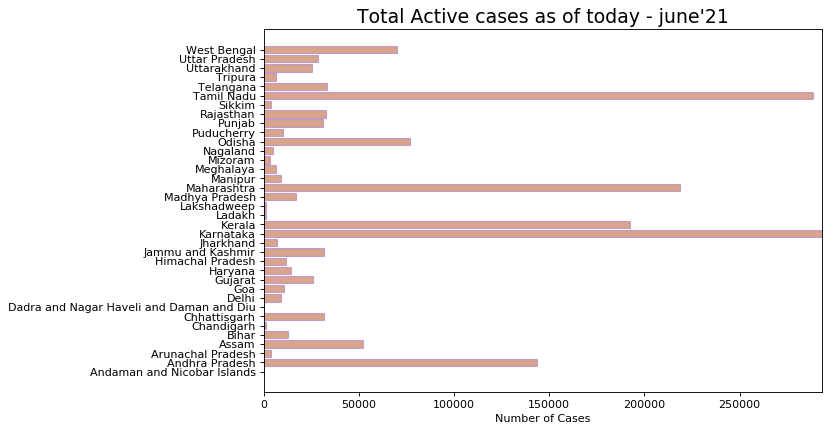

In [10]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')
plt.barh(no_of_states,df['new_active'], align='center', alpha=0.5,  
                 color=(0.7,0.3,0.1),  
                 edgecolor=(0.6,0.4,0.8)  )
    
plt.yticks(no_of_states, df['state_name'])  
plt.xlim(1,max(df['new_active'])+10) 
plt.xlabel('Number of Cases')  
plt.title("Total Active cases as of today - june'21", size = 17)  
plt.show()

In [11]:
df_new = df.set_index('state_name', drop=True)

In [12]:
df_new.head()

,active,cured,death,new_active,new_cured,new_death,new_positive,positive,state_code
state_name,,,,,,,,,
Andaman and Nicobar Islands,155,6745,118,143,6781,119,7043,7018,35
Andhra Pradesh,146737,1546617,11034,143795,1562229,11132,1717156,1704388,28
Arunachal Pradesh,3772,23754,116,3817,24083,118,28018,27642,12
Assam,52680,359802,3416,52408,364191,3477,420076,415898,18
Bihar,14251,688462,5222,12591,691234,5268,709093,707935,10


### Plotting all columns

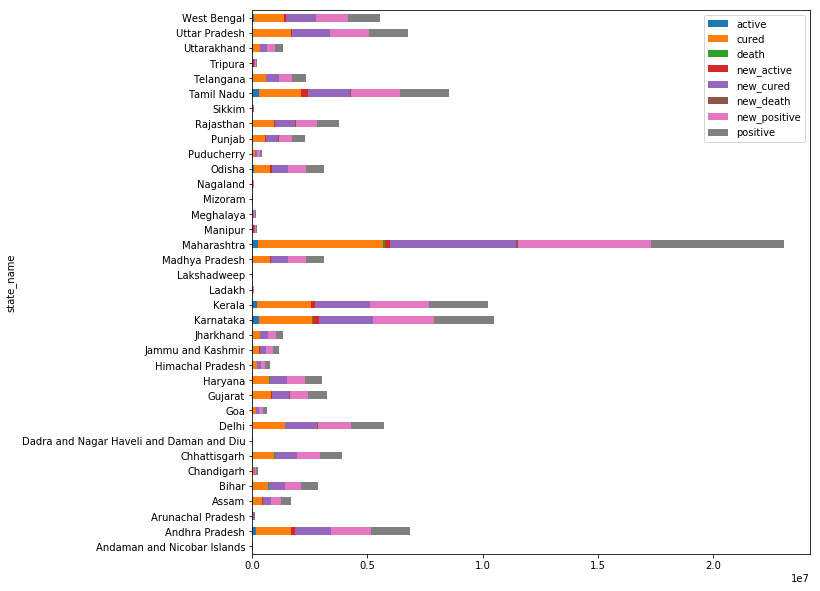

In [31]:
df_new.plot.barh(stacked=True,figsize=(10,10))

### Plotting for Cases cured

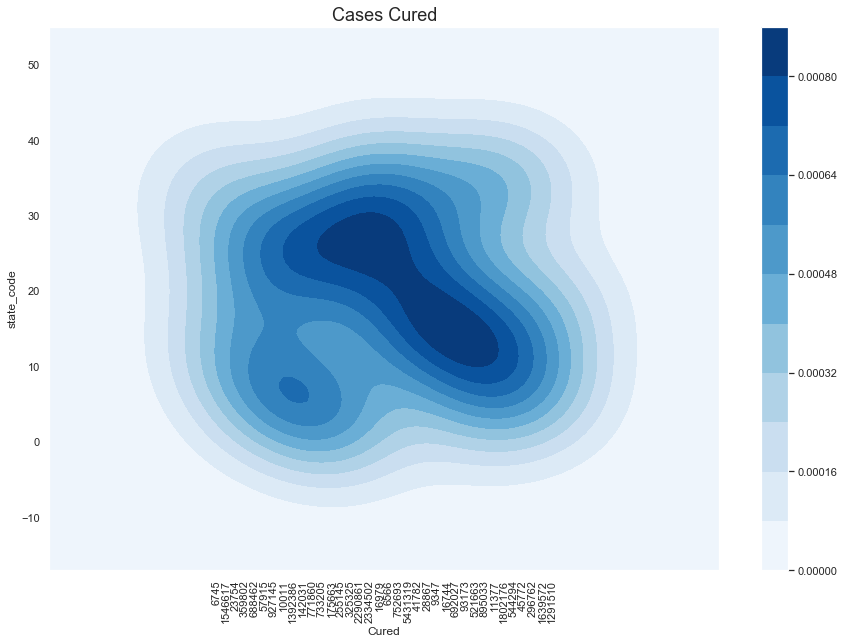

In [44]:
sns.set(rc={'figure.figsize':(15,10)})
x=df.cured
y=df.state_code
y_pos=np.arange(len(x))
plt.xticks(y_pos,x)
plt.xticks(rotation=90)
plt.xlabel('Cured')
plt.ylabel('states')
plt.title('Cases Cured', size = 18)

ax=sns.kdeplot(y_pos,y,cmap='Blues',shade=True,cbar=True)

### Regression plot showing prediction

Text(0.5,1,'Death among Covid positive ones')

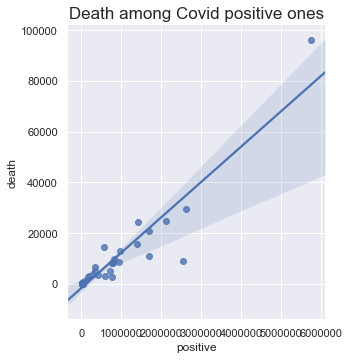

In [84]:
sns.lmplot(x = 'positive', y = 'death', data = df)
plt.title('Death among Covid positive ones', size = 17)

Text(0.5,1,'People cured Having covid')

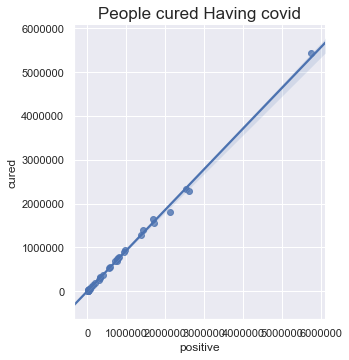

In [83]:
sns.lmplot(x = 'positive', y = 'cured', data = df)
plt.title('People cured Having covid' , size =17)

### New Positive cases per state

Text(0.5,1,'New Positive cases per State')

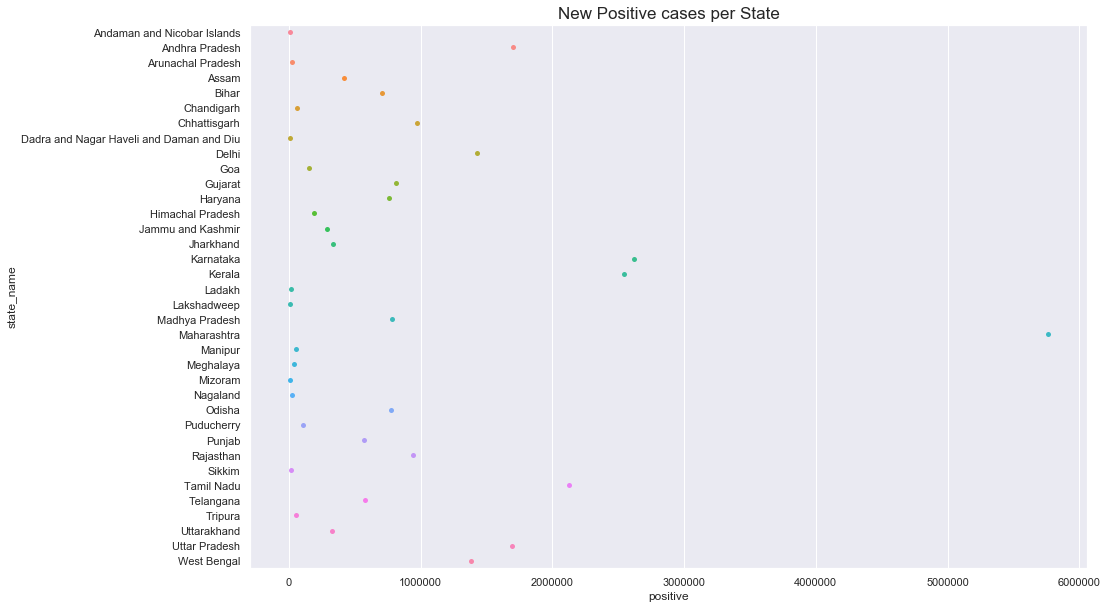

In [114]:
sns.swarmplot(y = df['state_name'], x = df['positive'])
plt.title("New Positive cases per State", size=17)

### Joinplot

<Figure size 1080x864 with 0 Axes>

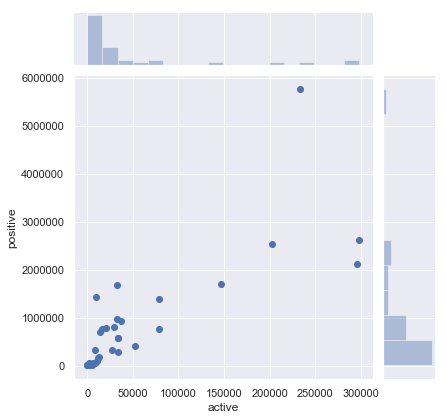

In [53]:
plt.figure(figsize=(15,12))
sns.jointplot(x="active", y="positive", data=df)

plt.show()

#### Heatmap

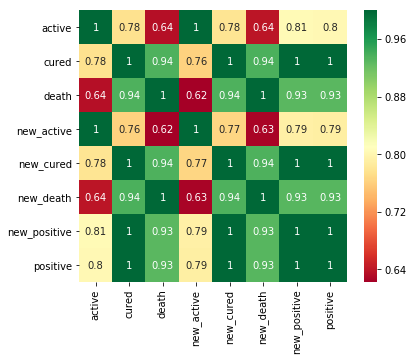

In [28]:
plt.figure(figsize =(6,5))
sns.heatmap(df_new.corr(), annot=True, cmap = "RdYlGn")

plt.show()

### Plotting Histogram with density estimate

D:\Software\Anaconda Ankur\Files\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


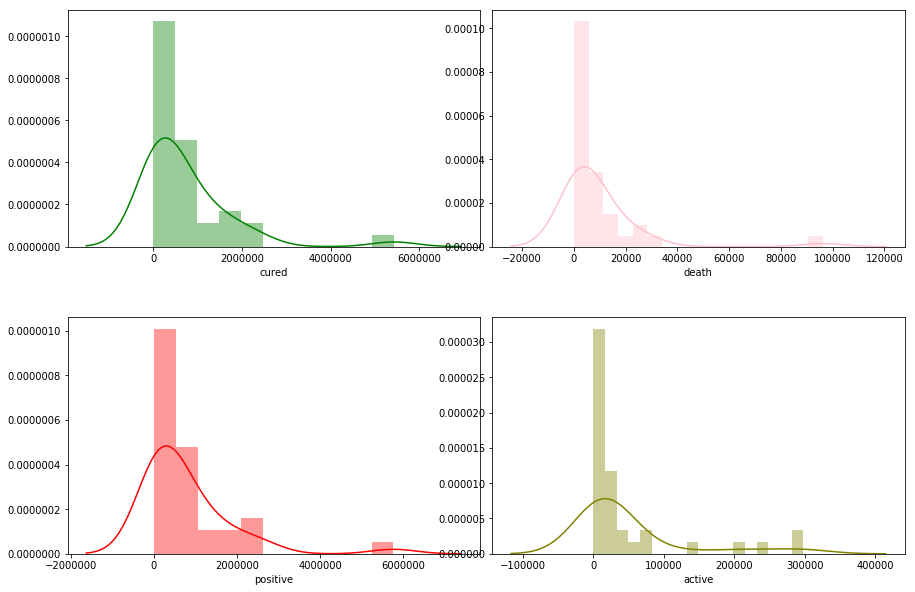

In [25]:
df['active']=df['positive']-(df['cured']+df['death'])
f,axes = plt.subplots(2, 2, figsize=(15,10))
sns.distplot( df["cured"] , color="green", ax=axes[0, 0])
sns.distplot( df["death"] , color="pink", ax=axes[0, 1])
sns.distplot( df["positive"] , color="red", ax=axes[1, 0])
sns.distplot( df["active"] , color="olive", ax=axes[1, 1])
f.subplots_adjust(hspace=.3,wspace=0.03)

## Plotting related to symptoms shown

In [14]:
symptom={'Symptom':['Fever','Cough','Tiredness','aches and pains','shortness of breath','Sore throat','Diarrhoea','Nausea','vomiting','abdominal pain'],'percent':[98.6,69.9,82.3,16.6,44.8,13.9,20.1,10.1,13.6,32.2]
    
}
symptom=pd.DataFrame(data=symptom,index=range(10))
symptom

,Symptom,percent
0,Fever,98.6
1,Cough,69.9
2,Tiredness,82.3
3,aches and pains,16.6
4,shortness of breath,44.8
5,Sore throat,13.9
6,Diarrhoea,20.1
7,Nausea,10.1
8,vomiting,13.6
9,abdominal pain,32.2


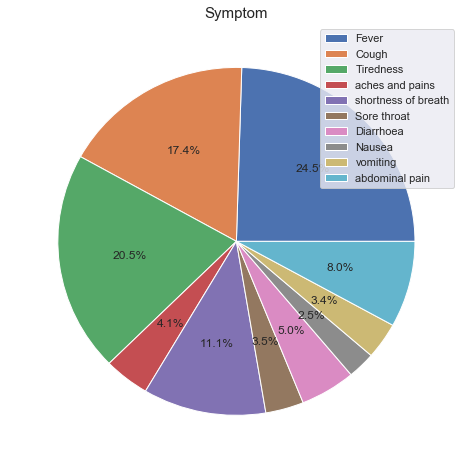

In [48]:
plt.figure(figsize=(8,8))
plt.title("Symptom",fontsize=15)
plt.pie(symptom["percent"],autopct="%1.1f%%")
plt.legend(symptom['Symptom'],loc='best')
plt.show()